# Assignment 3 
### Roll no: 20161170     Name: Shubh Maheshwari
## Stereo Calibration 


In [1]:
# Imports 
import cv2
import numpy as np
import matplotlib.pyplot as  plt

%matplotlib inline 

In [2]:
# Helper functions
def display_images(img_list, shape,fig_size=(8,8),is_gray=None):
    """
        Display multple images using matplotlib
        @param img_list:=> mxn matrix of images to be displayed
        @param shape:=> mxn shape
        @param is_gray:=> mxn matrix, is the i,j th the image grayscaled
    
        return None
    """
    
    if is_gray is None:
        is_gray = np.zeros(shape)
    
    m,n = shape
    fig = plt.figure(figsize=fig_size)
    
    for i in range(m):
        for j in range(n):
            ax = fig.add_subplot(m,n,i*n + j+1)
            if is_gray[i,j] == 1:
                ax.imshow(img_list[i][j],cmap='gray')
            else:
                img_list[i][j] = cv2.resize(img_list[i][j],(200,200))
                ax.imshow(img_list[i][j])   
            ax.axis('off')
    plt.show()
    return 

# Question 1 
```
    Using Dense Sift key point descriptors do matching on a pair of images
```

In [3]:
def dense_sift_matching(img1,img2,min_match_cnt=500):
#     Display the images
    display_images([[img1,img2]],shape=(1,2))
    
#     Initiliaze CV2 SIFT
    sift = cv2.xfeatures2d.SIFT_create()

# Define our keypoints

    h,w,c = img1.shape
    kp=[]
    for i in range(1,h,10):
        for j in range(1,w,10):
            kp.append(cv2.KeyPoint(i, j, 3))
    print("Checking Keypoinys",len(kp))
    
    
    #     Taking gray scale images for SIFT
    gray_im1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    kp1,des1 = sift.compute(gray_im1,kp)

    gray_im2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
    kp2,des2 = sift.compute(gray_im2,kp)

    # BFMatcher with default params
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)[0:min_match_cnt]
    print("Found Matches:",len(matches))
        
        
    draw_params = dict(matchesMask=None,
                       singlePointColor=None,
                       flags=2)
        
    dis_im = cv2.drawMatches(img1,kp1,img1,kp1,matches,None,**draw_params)
    display_images([[dis_im]],shape=(1,1),fig_size=(8,16))    
    return kp1,des1,kp2,des2,matches,dis_im

# Desne SIFT Matching

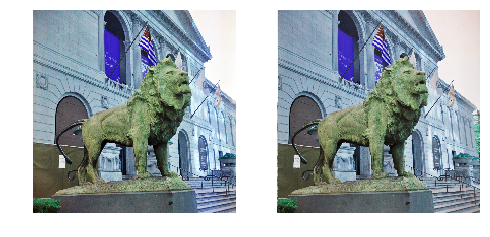

Checking Keypoinys 19460
Found Matches: 500


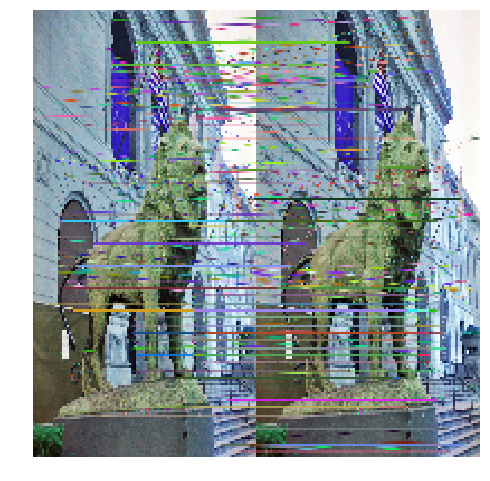

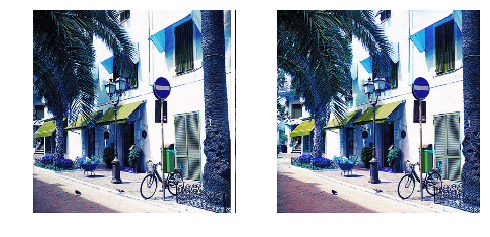

Checking Keypoinys 2450
Found Matches: 500


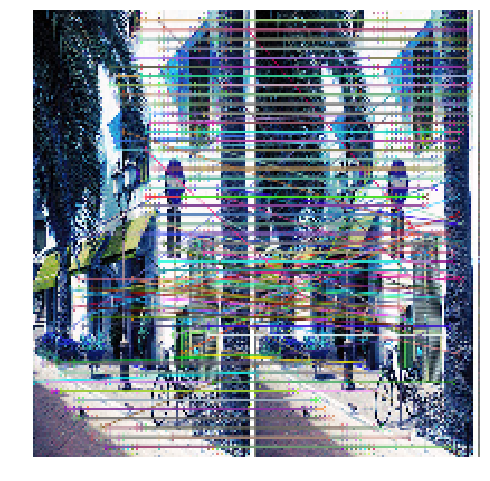

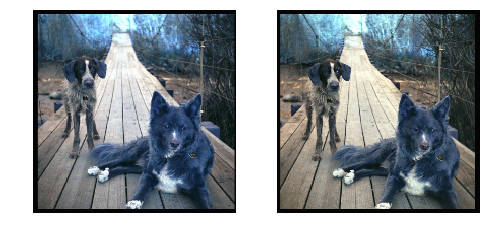

Checking Keypoinys 2808
Found Matches: 500


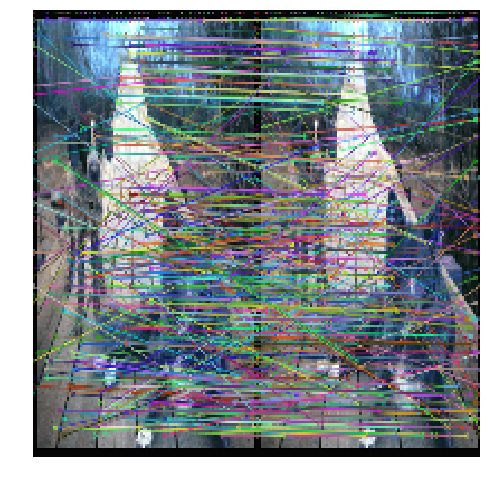

True

In [4]:
# Case 1
img = cv2.imread('./Stereo Images/Stereo_Pair1.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
cv2.imwrite('./results/Sift_Pair1.jpg',sift_param[-1])


# Case 2
img = cv2.imread('./Stereo Images/Stereo_Pair2.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
cv2.imwrite('./results/Sift_Pair2.jpg',sift_param[-1])


# Case 3 
img = cv2.imread('./Stereo Images/Stereo_Pair3.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
cv2.imwrite('./results/Sift_Pair3.jpg',sift_param[-1])

# Question 2 
```
Correlation Matching using patches
```

In [5]:
# Define Correlation as dot product(normalized) 
def corr(v1,v2):
    return v1.T.dot(v2)/(np.sqrt(v1.T.dot(v1))*np.sqrt(v2.T.dot(v2)))

In [6]:
def correlation_matching(img1,img2,window_size=128,stride=128,thresh = 0.01):
    h1,w1,c = img1.shape
    h2,w2,c = img2.shape
    
#     Pass through all the patches in img1 and find patch in img2 with least 
    best_matches = []
    for y1 in range(0,h1-window_size,stride):
        for x1 in range(0,w1-window_size,stride):
            least_dis = 1.0
            for y2 in range(0,h2-window_size,stride):
                for x2 in range(0,w2-window_size,stride):
                    v1 = img1[y1:y1+window_size, x1:x1+window_size,:].flatten()
                    v2 = img2[y2:y2+window_size, x2:x2+window_size,:].flatten()
                    dis = corr(v1,v2)
                    if least_dis > dis:
                        least_dis = dis
                        least_coord = [x1,y1,x2,y2,dis]
            best_matches.append(least_coord)
    return best_matches

In [7]:
def draw_matches(img,matches,window_size=128):
    h,w,c = img.shape
    for match in matches:
        pt1 = (match[1]+window_size//2,match[0]+window_size//2)
        pt2 = (match[3]+window_size//2+w//2,match[2]+ window_size//2)
        line_img = cv2.line(img,pt1,pt2,(0,0,225),3)
    
    display_images([[line_img]],shape=(1,1))
    return line_img

# Intensity Based Matching

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


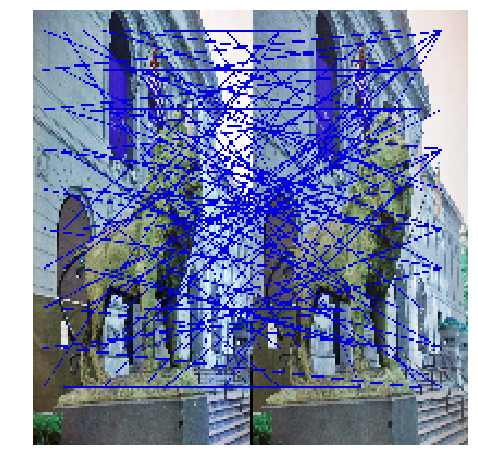

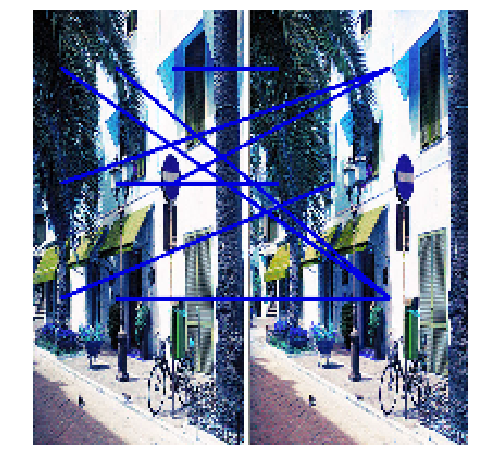

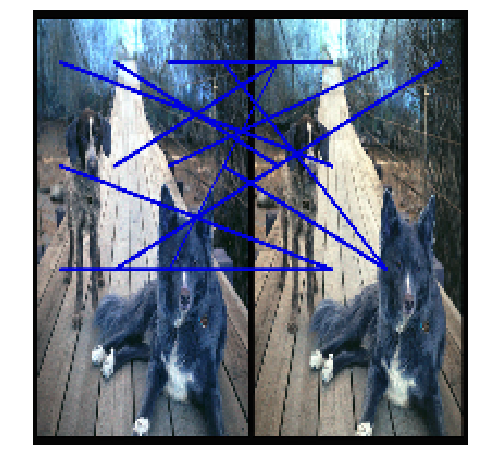

True

In [8]:
# Case 1
img = cv2.imread('./Stereo Images/Stereo_Pair1.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
matches = correlation_matching(img1,img2)
dis_im = draw_matches(img,matches)
cv2.imwrite('./results/Dense_Pair1.jpg',dis_im)

# Case 2
img = cv2.imread('./Stereo Images/Stereo_Pair2.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
matches = correlation_matching(img1,img2)
dis_im = draw_matches(img,matches)
cv2.imwrite('./results/Dense_Pair2.jpg',dis_im)

# Case 3
img = cv2.imread('./Stereo Images/Stereo_Pair3.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
matches = correlation_matching(img1,img2)
dis_im = draw_matches(img,matches)
cv2.imwrite('./results/Dense_Pair3.jpg',dis_im)

# Question 3
    We can clearly notice matching using SIFT discriptors gives much better reslts than naive correlation based 
    matching. High error in correlation based method is because a scene can have many similiar patches. 
    In case of stereo cameraa, their is a small offset in the camera location. This leads to the same scene 
    having different pixel values for a patch trying to represent the same scene.   

# Question 4
    Stereo Rectification

In [9]:
def stereo_rectification(img1,img2,sift_params,match_th =0.8):
    kp1,des1,kp2,des2,_,_ = sift_params
    
    index_params = dict(algorithm = 1, trees = 5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
#     Store best matches
    pts1 = []
    pts2 = []
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)
    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)
    
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.RANSAC)

    # We select only inlier points
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]
    img_size = img1.shape[0:2]
    p,H1,H2=cv2.stereoRectifyUncalibrated(pts1, pts2, F, img_size)
        
    H3= H1.dot(H2)
    img1_corrected = cv2.warpPerspective(img1, H1, img_size)
    img2_corrected = cv2.warpPerspective(img2, H3, img_size)
    
    return img1_corrected, img2_corrected


# Stereo Rectifiacton

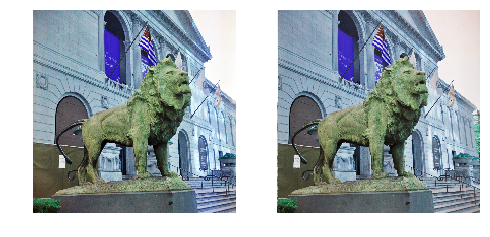

Checking Keypoinys 19460
Found Matches: 500


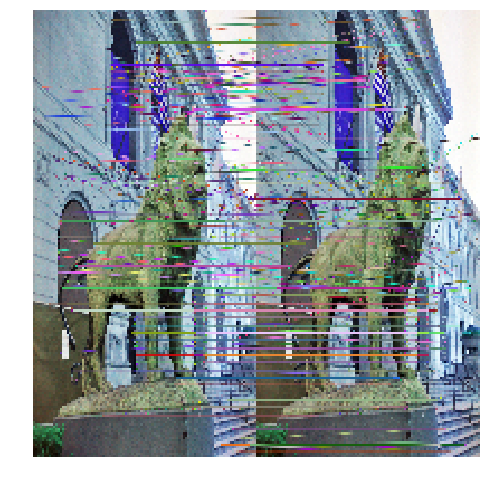

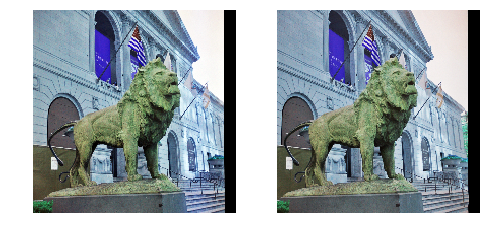

True

In [11]:
# Case 1
img = cv2.imread('./Stereo Images/Stereo_Pair1.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
rect_img1, rect_img2 = stereo_rectification(img1,img2,sift_param,match_th =0.8)
display_images([[rect_img1,rect_img2]],shape=(1,2))
cv2.imwrite('./results/Stereo_Rect1_1.jpg',rect_img1)
cv2.imwrite('./results/Stereo_Rect1_2.jpg',rect_img2)

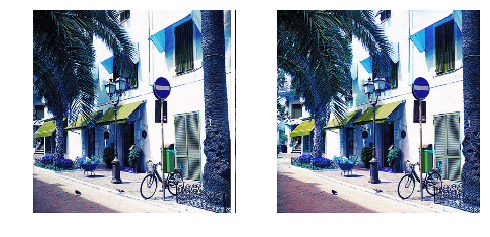

Checking Keypoinys 2450
Found Matches: 500


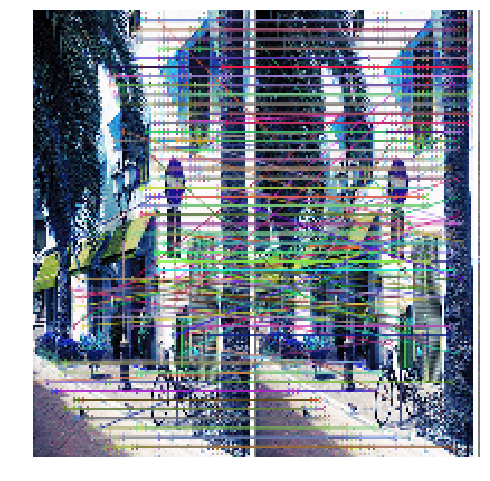

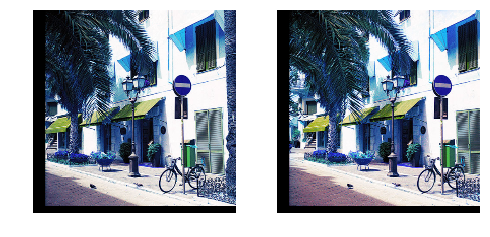

True

In [12]:
# Case 2
img = cv2.imread('./Stereo Images/Stereo_Pair2.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
rect_img1, rect_img2 = stereo_rectification(img1,img2,sift_param,match_th =0.8)
display_images([[rect_img1,rect_img2]],shape=(1,2))
cv2.imwrite('./results/Stereo_Rect2_1.jpg',rect_img1)
cv2.imwrite('./results/Stereo_Rect2_2.jpg',rect_img2)


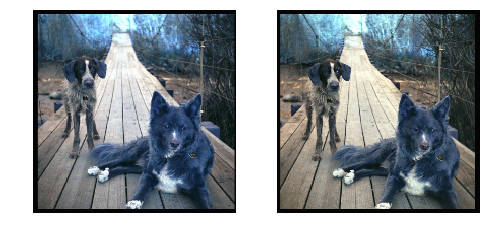

Checking Keypoinys 2808
Found Matches: 500


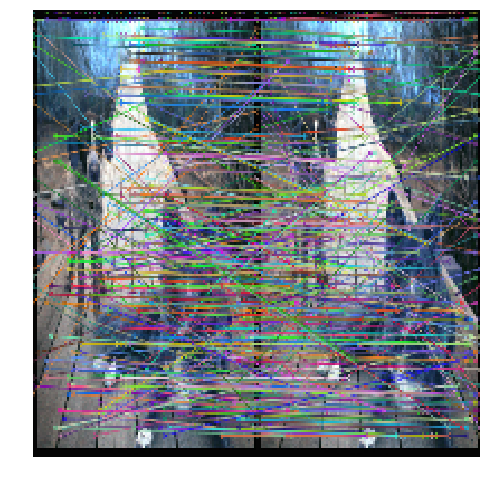

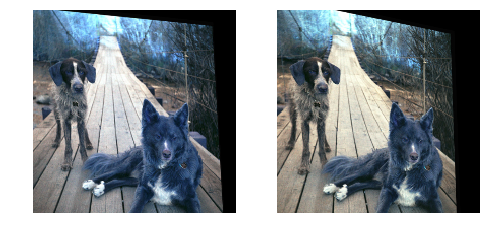

True

In [13]:
# Case 3
img = cv2.imread('./Stereo Images/Stereo_Pair3.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
rect_img1, rect_img2 = stereo_rectification(img1,img2,sift_param,match_th =0.8)
display_images([[rect_img1,rect_img2]],shape=(1,2))
cv2.imwrite('./results/Stereo_Rect3_1.jpg',rect_img1)
cv2.imwrite('./results/Stereo_Rect3_2.jpg',rect_img2)


# Question 5
    DTW matching works by finding the longest common subsequence between to lines. Here the lines are epipolar lines of the 2 stereo images
    
![Longest Sequence](./Stereo Images/LCS-Backtrack-Wiki.png)

We compute the longest subsequence on the epipolar lines of the 2 stereo images. Before computing the epipolar lines we warp the images images such that the epipolar lines are horizontal, this makes it easy and faster to run LCS

In [14]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c,_ = img1.shape
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

def longest_common_subsequence(line1, line2):
    dp = np.zeros((line1.shape[0]+1,line2.shape[0]+1))
    
    for i,x in enumerate(line1):
        for j,y in enumerate(line2):
            if(i==0 or j==0):
                continue
            elif (line1[i-1] == line1[j-1]): 
                dp[i,j] = 1 + dp[i-1][j-1]
            else:
                dp[i,j] = max(dp[i-1,j], dp[i,j-1])

    i = line1.shape[0], j = line2.shape[0]; 
    lcs = np.zeros(line1.shape[0])
    index = line1.shape[0]
    while (i > 0 and j > 0) : 
        if (line1[i-1] == line2[j-1]): 
            lcs[index-1] = line1[i-1]
            i-=1
            j-=1
            index-=1 
      
        elif (dp[i-1,j] > dp[i,j-1]): 
            i-=1 
        else:
            j-=1
    return lcs

def plot_epipolar_lines(img1,img2,sift_params,match_th =0.8):
    kp1,des1,kp2,des2,_,_ = sift_params
    
    index_params = dict(algorithm = 1, trees = 5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
#     Store best matches
    pts1 = []
    pts2 = []
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)
    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)
    
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.RANSAC)

    # We select only inlier points
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]
 
    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    img3,img4 = drawlines(img1,img2,lines1,pts1,pts2)

    # Find epilines corresponding to points in left image (first image) and
    # drawing its lines on right image
    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)
    img5,img6 = drawlines(img2,img1,lines2,pts2,pts1)
    
    display_images([[img3,img4], [img5,img6]],shape=(2,2))
    
    return lines1,lines2

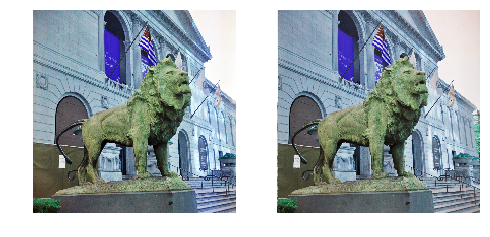

Checking Keypoinys 19460
Found Matches: 500


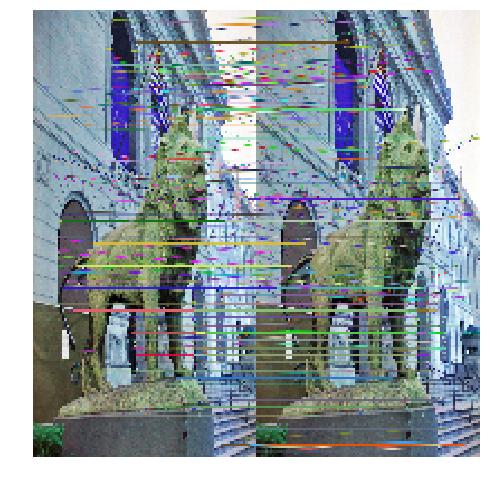

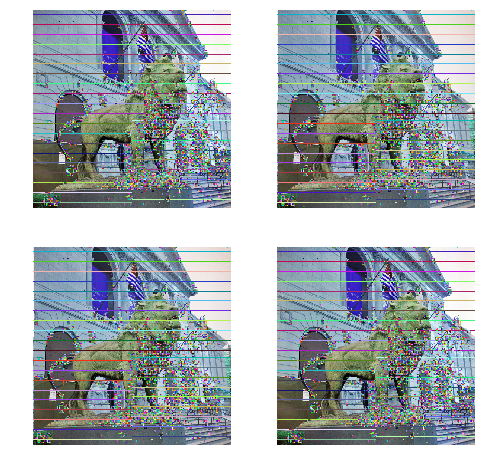

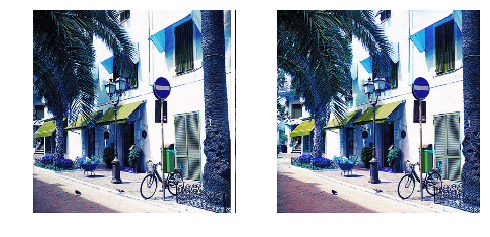

Checking Keypoinys 2450
Found Matches: 500


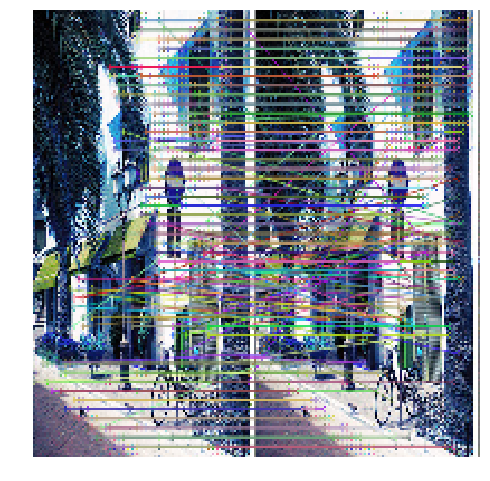

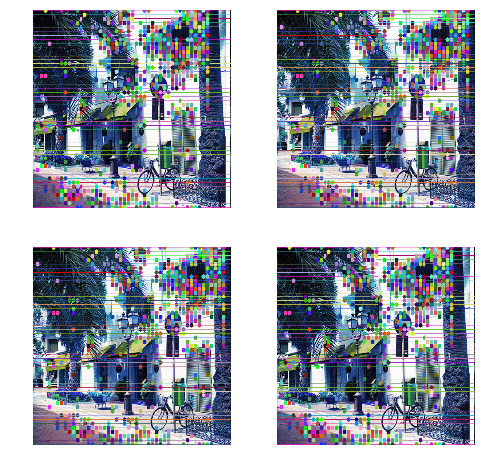

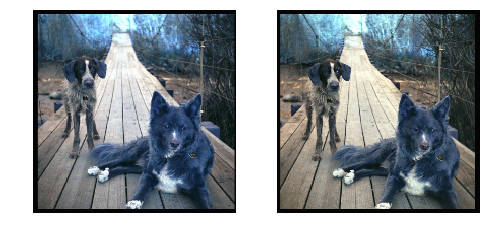

Checking Keypoinys 2808
Found Matches: 500


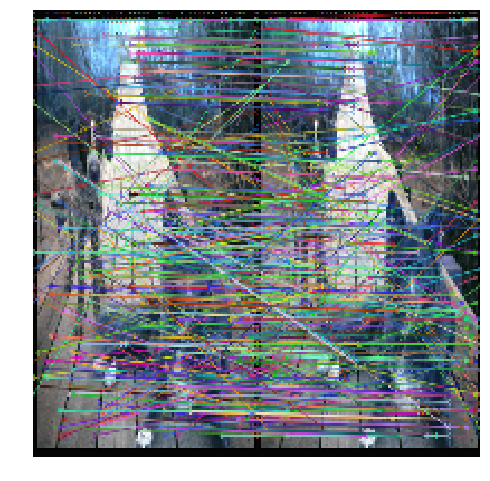

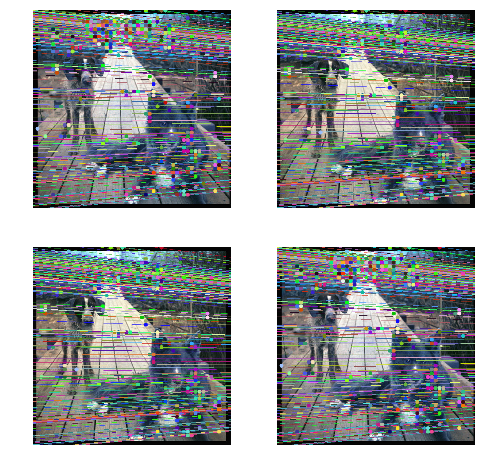

In [15]:
# Case 1
img = cv2.imread('./Stereo Images/Stereo_Pair1.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
l1,l2 = plot_epipolar_lines(img1,img2,sift_param)

# Case 2
img = cv2.imread('./Stereo Images/Stereo_Pair2.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
l1, l2 = plot_epipolar_lines(img1,img2,sift_param)

# Case 3
img = cv2.imread('./Stereo Images/Stereo_Pair3.jpg')
h,w,c = img.shape
img1 = img[:,0:w//2,:]
img2 = img[:,w//2:w,:]
sift_param = dense_sift_matching(img1,img2)
l1,l2 = plot_epipolar_lines(img1,img2,sift_param)